In [2]:
from utils.dataloaders import create_dataloader
from utils.general import (LOGGER, TQDM_BAR_FORMAT, Profile, check_dataset, check_img_size, check_requirements,
                           check_yaml, coco80_to_coco91_class, colorstr, increment_path, non_max_suppression,
                           print_args, scale_boxes, xywh2xyxy, xyxy2xywh)


In [3]:
task = 'val'
dataset_yaml = "./datasets/T16bit_25k_09-03-2023/dataset.yaml"
#dataset_yaml = "./datasets/T8bit_minmax_25k_05-03-2023/dataset.yaml"
data = check_dataset(dataset_yaml)  # check

dataloader, dataset = create_dataloader(
    data[task], # 
    imgsz=640,
    batch_size=16,
    stride=1,
    single_cls=False,
    pad=0.5,
    rect=False,
    prefix=colorstr(f'{task}: '))

val: Scanning /home/jigglypuff/GitHub/yolov5-extended/datasets/T16bit_25k_09-03-2023/labels/val.cache... 7341 images, 390 backgrounds, 2 corrupt: 100%|██████████| 7341/7341 00:00
val: WARNING ⚠️ /home/jigglypuff/GitHub/yolov5-extended/datasets/T16bit_25k_09-03-2023/images/val/0k_1354692_r.png: 12 duplicate labels removed
val: WARNING ⚠️ /home/jigglypuff/GitHub/yolov5-extended/datasets/T16bit_25k_09-03-2023/images/val/1d_9120754_l.png: 2 duplicate labels removed
val: WARNING ⚠️ /home/jigglypuff/GitHub/yolov5-extended/datasets/T16bit_25k_09-03-2023/images/val/6z_1355074_r.png: 3 duplicate labels removed
val: WARNING ⚠️ /home/jigglypuff/GitHub/yolov5-extended/datasets/T16bit_25k_09-03-2023/images/val/cl_1354653_r.png: 84 duplicate labels removed
val: WARNING ⚠️ /home/jigglypuff/GitHub/yolov5-extended/datasets/T16bit_25k_09-03-2023/images/val/ll_1333457_l.png: ignoring corrupt image/label: negative label values [  -0.027344   -0.017188]
val: WARNING ⚠️ /home/jigglypuff/GitHub/yolov5-extend

In [4]:
for img, labels, im_file, ((h0, w0), (_, pad)) in dataset:
    print(img.shape, labels.shape, h0, w0, pad)
    break

torch.Size([3, 640, 640]) torch.Size([0, 6]) 640 512 (64.0, 0.0)


In [5]:
import numpy as np
import cv2
from PIL import Image
import glob
import random
import os

data_dir = "./datasets/T16bit_25k_09-03-2023/images/val/"
img_fpaths = glob.glob(os.path.join(data_dir, "*.png"))

(640, 512)
(640, 512)


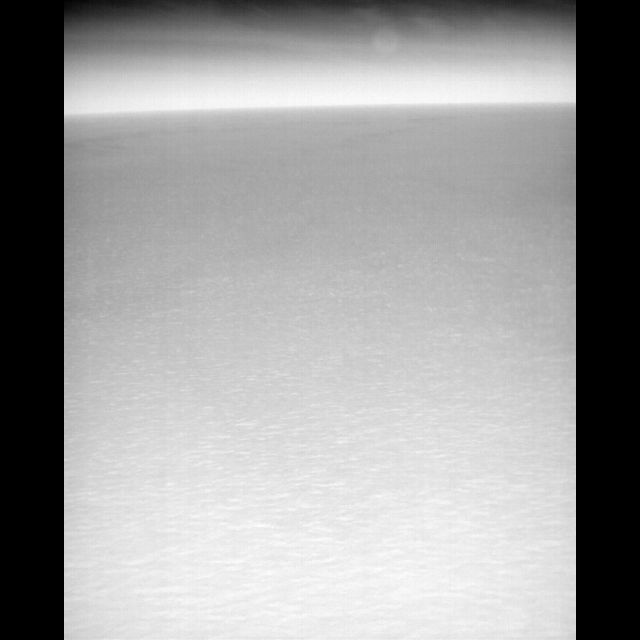

In [7]:
def vis_16bit(img, pad):
    pad = np.array(pad, dtype=int)
    img = img[0].numpy()
    h, w = img.shape
    # unpad
    img = img[..., pad[1]:h-pad[1], pad[0]:w-pad[0]]
    print(img.shape)
    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    # pad again
    print(img.shape)
    return np.pad(img, ((pad[1], pad[1]), (pad[0], pad[0])), 'constant', constant_values=0)

Image.fromarray(vis_16bit(img, pad)) #.transpose(1,2,0).astype(np.uint8))

In [8]:
dataloader

Type:        InfiniteDataLoader
String form: <utils.dataloaders.InfiniteDataLoader object at 0x7f661c0b1e20>
Length:      459
File:        ~/GitHub/yolov5-extended/utils/dataloaders.py
Docstring:  
Dataloader that reuses workers

Uses same syntax as vanilla DataLoader

In [10]:
for i, (imgs, targets, paths, shapes) in enumerate(dataloader):
    print(i, imgs.shape, targets.shape, paths, shapes)
    break

0 torch.Size([16, 3, 640, 640]) torch.Size([39, 6]) ['/home/jigglypuff/GitHub/yolov5-extended/datasets/T16bit_25k_09-03-2023/images/val/00_12179422_l.png', '/home/jigglypuff/GitHub/yolov5-extended/datasets/T16bit_25k_09-03-2023/images/val/00_1292247_r.png', '/home/jigglypuff/GitHub/yolov5-extended/datasets/T16bit_25k_09-03-2023/images/val/00_1295175_l.png', '/home/jigglypuff/GitHub/yolov5-extended/datasets/T16bit_25k_09-03-2023/images/val/00_23301714_l.png', '/home/jigglypuff/GitHub/yolov5-extended/datasets/T16bit_25k_09-03-2023/images/val/00_23437259_l.png', '/home/jigglypuff/GitHub/yolov5-extended/datasets/T16bit_25k_09-03-2023/images/val/00_9122020_r.png', '/home/jigglypuff/GitHub/yolov5-extended/datasets/T16bit_25k_09-03-2023/images/val/00_9131776_l.png', '/home/jigglypuff/GitHub/yolov5-extended/datasets/T16bit_25k_09-03-2023/images/val/01_17958316_l.png', '/home/jigglypuff/GitHub/yolov5-extended/datasets/T16bit_25k_09-03-2023/images/val/01_17978083_l.png', '/home/jigglypuff/GitHub